자료출처<br>
[기상청_기상자료개방포털_통계분석_기온분석_분포도](https://data.kma.go.kr/stcs/grnd/grndTaDmap.do?pgmNo=206)<br>
[기상청_기상자료개방포털_통계분석_강수량분석_분포도](https://data.kma.go.kr/stcs/grnd/grndRnDmap.do?pgmNo=207)

In [67]:
from __future__ import print_function
import pandas as pd
from IPython.display import display

In [68]:
temp_df = pd.read_csv("data_folder/temperature_analysis.csv", sep=",", dtype={"평균기온(°C)": float})
pptn_df = pd.read_csv("data_folder/precipitation_analysis.csv", sep=",")

In [69]:
def display_set(n1, n2):
    pd.set_option("display.max_rows", n1)
    pd.set_option("display.max_columns", n2)

def display_reset():
    pd.reset_option("^display.", silent=True)

In [70]:
display(temp_df)
display(pptn_df)

,지점정보,경도,위도,평균기온(°C),최저기온(°C),최고기온(°C)
0,속초(90),128.56473,38.25085,1.8,-2.0,5.1
1,북춘천(93),127.75443,37.94738,-2.5,-8.2,2.7
2,철원(95),127.30420,38.14787,-2.6,-10.0,4.1
3,동두천(98),127.06070,37.90188,-1.1,-7.4,4.7
4,파주(99),126.76648,37.88589,-2.7,-9.8,3.5
...,...,...,...,...,...,...
90,합천(285),128.16994,35.56505,1.8,-5.3,10.7
91,밀양(288),128.74412,35.49147,2.6,-4.4,10.9
92,산청(289),127.87910,35.41300,1.4,-6.3,9.6
93,거제(294),128.60459,34.88818,4.9,-0.4,10.3


,지점정보,경도,위도,강수량(mm)
0,속초(90),128.56473,38.25085,68.7
1,북춘천(93),127.75443,37.94738,5.2
2,철원(95),127.30420,38.14787,4.9
3,동두천(98),127.06070,37.90188,8.3
4,파주(99),126.76648,37.88589,5.8
...,...,...,...,...
90,합천(285),128.16994,35.56505,1.2
91,밀양(288),128.74412,35.49147,3.0
92,산청(289),127.87910,35.41300,1.7
93,거제(294),128.60459,34.88818,5.0


+ 두 개의 데이터프레임을 조인 연산을 통해서 합칠 수 있다.

In [71]:
df = pd.merge(left=temp_df, right=pptn_df, how="inner", on="지점정보")
display(df)

,지점정보,경도_x,위도_x,평균기온(°C),최저기온(°C),최고기온(°C),경도_y,위도_y,강수량(mm)
0,속초(90),128.56473,38.25085,1.8,-2.0,5.1,128.56473,38.25085,68.7
1,북춘천(93),127.75443,37.94738,-2.5,-8.2,2.7,127.75443,37.94738,5.2
2,철원(95),127.30420,38.14787,-2.6,-10.0,4.1,127.30420,38.14787,4.9
3,동두천(98),127.06070,37.90188,-1.1,-7.4,4.7,127.06070,37.90188,8.3
4,파주(99),126.76648,37.88589,-2.7,-9.8,3.5,126.76648,37.88589,5.8
...,...,...,...,...,...,...,...,...,...
90,합천(285),128.16994,35.56505,1.8,-5.3,10.7,128.16994,35.56505,1.2
91,밀양(288),128.74412,35.49147,2.6,-4.4,10.9,128.74412,35.49147,3.0
92,산청(289),127.87910,35.41300,1.4,-6.3,9.6,127.87910,35.41300,1.7
93,거제(294),128.60459,34.88818,4.9,-0.4,10.3,128.60459,34.88818,5.0


In [72]:
import matplotlib.pyplot as plt

In [73]:
condition_temp = (df["평균기온(°C)"] > -1.0) & (df["평균기온(°C)"] < 1.0)
df_c = df[condition_temp]
display(df_c)

,지점정보,경도_x,위도_x,평균기온(°C),최저기온(°C),최고기온(°C),경도_y,위도_y,강수량(mm)
11,서울(108),126.96580,37.57142,0.5,-3.4,4.4,126.96580,37.57142,7.9
12,인천(112),126.62490,37.47772,-0.1,-3.0,2.8,126.62490,37.47772,7.6
13,원주(114),127.94659,37.33749,-0.4,-5.2,4.1,127.94659,37.33749,4.9
15,수원(119),126.98300,37.25746,-0.2,-5.4,4.9,126.98300,37.25746,12.3
16,영월(121),128.45743,37.18126,-0.3,-6.6,6.0,128.45743,37.18126,3.7
18,서산(129),126.49390,36.77658,-0.5,-6.2,5.1,126.49390,36.77658,18.3
20,청주(131),127.44066,36.63924,0.7,-4.4,5.5,127.44066,36.63924,3.7
21,대전(133),127.37211,36.37198,0.7,-4.6,7.0,127.37211,36.37198,4.4
22,추풍령(135),127.99458,36.22025,0.0,-7.7,6.8,127.99458,36.22025,3.2
23,안동(136),128.70733,36.57293,0.5,-6.5,7.3,128.70733,36.57293,0.0


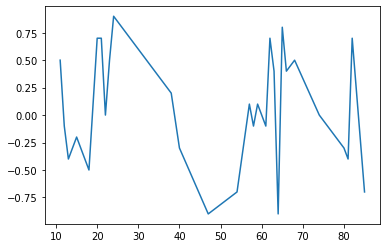

In [74]:
plt.plot(df_c["평균기온(°C)"])
plt.show()